In [5]:
import numpy as np
import matplotlib.pyplot as plt

### For an H with dvc = 10, if you want 95% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

In [17]:
def get_N(dvc=10, delta=0.05, epsilon=0.05, initial_N=1000, tolerance = 1):
    """Uses recursion to iterate N until it converges within a tolerance
       
       Args: dvc = VC dimension
             delta = 1 - %confidence
             epsilon = generalization error
             initial_N = initial guess of sample size 
             tolerance = constraint at which to stop the recursion and state convergence
             
        Returns: N = Number of samples required
    
    """
    
    new_N = 8 / epsilon**2 * np.log((4 * ((2 * initial_N) ** dvc)) / delta) # formula to generate new N
    
    if abs(new_N - initial_N) < tolerance: # Did it converge within a specific tolerance?
        return new_N
          
    else: # If so return N
        return get_N(dvc, delta, epsilon, new_N, tolerance) # If not iterate with new N

print("The closest numerical approximation of the minimum sample "\
      "size that the VC generalization bound predicts is {}".format(int(get_N())))



The closest numerical approximation of the minimum sample size that the VC generalization bound predicts is 452956


## For a relatively large Probabiliy ( 1 - delta ): Following Generalization bounds hold
* VC Bound
* Rademacher Penalty Bound
* Parrondo and Van den Broek
* Devroye


I will show each bound as function : N --> log( epsilon )  ( fixing dvc = 50 and delta = 0.05 ) ( take log of epsilon to zoom in! )

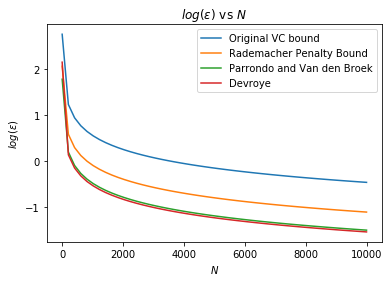

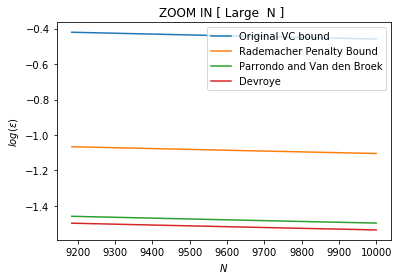

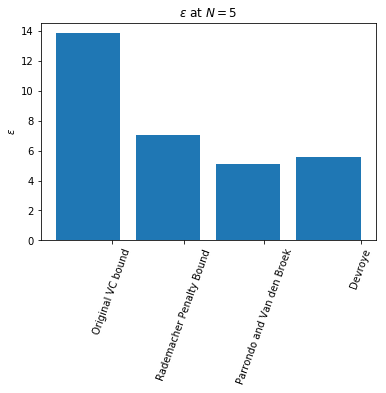

In [37]:
N = np.linspace(start=3, stop=10000, dtype="float64")
dvc = 50
delta = 0.05


# need to take log of mH prior due to overflow error
# from Devroye bound since 4mH(N^2) --> overflow
# since mH(N) = N^dvc + 1
# log(mH(N)) is approximately dvc * log(N)



## Labda expression:
logmH = lambda constant, N, dvc: dvc * np.log(constant * N)  # approximately log(mH) 

epsilon_VC = lambda N, dvc, delta: np.sqrt(8 / N * (np.log(4) + logmH(2, N, dvc) - np.log(delta)))

epsilon_rademacher = lambda N, dvc, delta: (np.sqrt(2 / N * (np.log(2 * N) + logmH(1, N, dvc))) + 
                                              np.sqrt(2 / N * np.log(1 / delta)) + 
                                              1 / N)

epsilon_parr_and_vdb = lambda N, dvc, delta: (1 + np.sqrt(N * (np.log(6) + logmH(2, N, dvc) - np.log(delta)) + 1)) / N

epsilon_devroye = lambda N, dvc, delta: (2 + 
                                         np.sqrt(2 * N * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) - 
                                                     4 * (np.log(4) + logmH(1, N**2, dvc) - np.log(delta)) + 
                                                        4)
                                        ) / (2 * (N - 2))

epsilons = [epsilon_VC(N, dvc, delta), 
            epsilon_rademacher(N, dvc, delta),
            epsilon_parr_and_vdb(N, dvc, delta),
            epsilon_devroye(N, dvc, delta)]

bounds = ["Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye"]

plt.title("$log(\epsilon)$ vs $N$")
plt.xlabel("$N$")
plt.ylabel("$log(\epsilon)$")
for i in range(4):
    plt.plot(N, np.log(epsilons[i]))
    plt.legend(bounds)
plt.show()


## On Large N
plt.title("ZOOM IN [ Large  N ] ")
plt.xlabel("$N$")
plt.ylabel("$log(\epsilon)$")
for i in range(4):
    # Slice to zoom in 
    plt.plot(N[-5:], np.log(epsilons[i][-5:]))
    plt.legend(bounds)
plt.show()



## On extra small input N ( say 5 ) :
N = 5
epsilons = [epsilon_VC(N, dvc, delta), 
            epsilon_rademacher(N, dvc, delta),
            epsilon_parr_and_vdb(N, dvc, delta),
            epsilon_devroye(N, dvc, delta)]

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

plt.title("$\epsilon$ at $N=5$")
plt.ylabel("$\epsilon$")
plt.xticks([0.3, 1.2, 2.2, 3.4], bounds, rotation=70)

plt.bar(np.arange(4), epsilons)
plt.show()
